In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seawater as sw
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

fig_dir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Saildrone/'

icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'

data_dir = 'F:/data/cruise_data/saildrone/2019_arctic/post_mission/'

adir_sbe='F:/data/cruise_data/saildrone/2019_arctic/sbe56/sd-'

data_dir_sbe_combined = 'F:/data/cruise_data/saildrone/2019_arctic/post_mission_combined/'

In [2]:
ds = xr.open_mfdataset(data_dir_sbe_combined+'*.nc',combine='nested',concat_dim='trajectory').load()
ds

<xarray.Dataset>
Dimensions:                         (time: 215731, trajectory: 2)
Coordinates:
  * time                            (time) datetime64[ns] 2019-05-14T23:00:00 ... 2019-10-11T18:30:00
    lat                             (trajectory, time) float64 53.85 ... 53.84
    lon                             (trajectory, time) float64 -166.6 ... -166.6
  * trajectory                      (trajectory) object '1036' '1037'
Data variables:
    SOG                             (trajectory, time) float64 1.41 ... 0.005
    SOG_FILTERED_MEAN               (trajectory, time) float64 1.194 ... 0.028
    SOG_FILTERED_STDDEV             (trajectory, time) float64 0.096 ... 0.02
    SOG_FILTERED_MAX                (trajectory, time) float64 1.48 ... 0.095
    SOG_FILTERED_MIN                (trajectory, time) float64 1.041 ... 0.002
    COG                             (trajectory, time) float64 324.0 ... 93.4
    COG_FILTERED_MEAN               (trajectory, time) float64 324.6 ... 83.2
    COG_

In [ ]:
#make diruanl plot
ds2=ds#.isel(trajectory=0)
xlon=ds2.lon
tdif=ds2.TEMP_CTD_RBR_MEAN-ds2.TEMP_SBE37_MEAN
time_offset_to_lmt=(xlon/360.)*24.*60
ds2['tlmt']=ds2.lon
for i in range(2):
    ds2['tlmt'][i,:]= ds2.time.data+time_offset_to_lmt[i,:]*np.timedelta64(1,'m')# dt.timedelta(seconds=1)

In [ ]:
tdif=ds2.TEMP_CTD_RBR_MEAN-ds2.TEMP_SBE37_MEAN
fig,(ax1,ax2) =plt.subplots(1,2)
for i in range(2):
    cs=ax1.scatter(ds2.wspd_MEAN[i,:],tdif[i,:],c=ds2.time.dt.hour,s=.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='RBR - SBE4 SST (K)')
ax1.set_xlim(0,15)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('GMT Time (hrs)')
for i in range(2):
    cs2=ax2.scatter(ds2.time.dt.hour,tdif[i,:],c=ds2.wspd_MEAN[i,:],s=.5)
ax2.set(xlabel='GMT (hr)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (ms$^{-1}$)')
fig.savefig(fig_dir+'figs/temp_buld_dw_data.png')

tdif=ds2.TEMP_CTD_RBR_MEAN-ds2.TEMP_SBE37_MEAN
fig,(ax1,ax2) =plt.subplots(1,2)
cs=ax1.scatter(ds2.wspd_MEAN[0,:],tdif[i,:],c=ds2.time.dt.hour,s=.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='RBR - SBE4 SST (K)')
ax1.set_xlim(0,15)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('GMT Time (hrs)')
cs2=ax2.scatter(ds2.time.dt.hour,tdif[0,:],c=ds2.wspd_MEAN[i,:],s=.5)
ax2.set(xlabel='GMT (hr)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (ms$^{-1}$)')
fig.savefig(fig_dir+'figs/temp_buld_dw_data36.png')

tdif=ds2.TEMP_CTD_RBR_MEAN-ds2.TEMP_SBE37_MEAN
fig,(ax1,ax2) =plt.subplots(1,2)
cs=ax1.scatter(ds2.wspd_MEAN[1,:],tdif[i,:],c=ds2.time.dt.hour,s=.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='RBR - SBE4 SST (K)')
ax1.set_xlim(0,15)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('GMT Time (hrs)')
cs2=ax2.scatter(ds2.time.dt.hour,tdif[1,:],c=ds2.wspd_MEAN[i,:],s=.5)
ax2.set(xlabel='GMT (hr)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (ms$^{-1}$)')
fig.savefig(fig_dir+'figs/temp_buld_dw_data37.png')

In [ ]:
tdif=ds2.TEMP_CTD_RBR_MEAN-ds2.sea_water_temperature_01_mean
fig,(ax1,ax2) =plt.subplots(1,2)
for i in range(2):
    cs=ax1.scatter(ds2.wspd_MEAN[i,:],tdif[i,:],c=ds2.time.dt.hour,s=.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='RBR - SBE4 SST (K)')
ax1.set_xlim(0,15)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('GMT Time (hrs)')
for i in range(2):
    cs2=ax2.scatter(ds2.time.dt.hour,tdif[i,:],c=ds2.wspd_MEAN[i,:],s=.5)
ax2.set(xlabel='GMT (hr)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (ms$^{-1}$)')
fig.savefig(fig_dir+'figs/temp_rbr-sbe-buld_dw_data36.png')


In [ ]:

tdif=ds2.TEMP_SBE37_MEAN-ds2.sea_water_temperature_01_mean
fig,(ax1,ax2) =plt.subplots(1,2)
for i in range(2):
    cs=ax1.scatter(ds2.wspd_MEAN[i,:],tdif[i,:],c=ds2.time.dt.hour,s=.5)
ax1.set(xlabel='Wind Speed (ms$^{-1}$)', ylabel='SBE37 - SBE4 SST (K)')
ax1.set_xlim(0,15)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('GMT Time (hrs)')
for i in range(2):
    cs2=ax2.scatter(ds2.time.dt.hour,tdif[i,:],c=ds2.wspd_MEAN[i,:],s=.5)
ax2.set(xlabel='GMT (hr)')
cbar = fig.colorbar(cs2,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (ms$^{-1}$)')
fig.savefig(fig_dir+'figs/temp_sbe-sbe-buld_dw_data.png')

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_00_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_00_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_00_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_01_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_01_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_01_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_02_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_02_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_02_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_04_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_04_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_04_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_05_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_05_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_05_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

In [ ]:
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_06_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_06_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)
tdif=ds.TEMP_O2_RBR_MEAN-ds.sea_water_temperature_06_mean
print(tdif.mean('time').data,tdif.std('time').data,(np.isfinite(tdif)).sum('time').data)

# PLOT DIURANL WARMING

In [ ]:
ds10=ds.isel(trajectory=0).resample(time='10min').mean()

In [ ]:
plt.figure(figsize=(12,6))
subset=ds10.sel(time=slice('2019-06-15T08','2019-06-16'))
for i in range(2):
    var='sea_water_temperature_'+str(i).zfill(2)+'_mean'
    lvar=str(i).zfill(2)
    plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
var='TEMP_SBE37_MEAN'
lvar='SBE37'
plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
for i in range(2,7):
    var='sea_water_temperature_'+str(i).zfill(2)+'_mean'
    lvar=str(i).zfill(2)
    if i==3:
        continue
    plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
plt.legend()
plt.ylabel('$\Delta$ T (K)')
plt.xlabel('Time (GMT)')
plt.savefig(fig_dir+'figs/diurnal36_06-15.png')


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(subset.time,subset.TEMP_AIR_MEAN-subset.sea_water_temperature_00_mean,label=lvar)


In [ ]:
plt.figure(figsize=(12,6))
subset=ds10.sel(time=slice('2019-07-08T12','2019-07-10T12'))
for i in range(2):
    var='sea_water_temperature_'+str(i).zfill(2)+'_mean'
    lvar=str(i).zfill(2)
    plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
var='TEMP_SBE37_MEAN'
lvar='SBE37'
plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
for i in range(2,7):
    var='sea_water_temperature_'+str(i).zfill(2)+'_mean'
    lvar=str(i).zfill(2)
    if i==3:
        continue
    plt.plot(subset.time,subset[var]-subset.sea_water_temperature_06_mean,label=lvar,lw=3)
plt.legend()
plt.ylabel('$\Delta$ T (K)')
plt.xlabel('Time (GMT)')
plt.savefig(fig_dir+'figs/diurnal36_07-08.png')


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(subset.time,subset.TEMP_AIR_MEAN-subset.sea_water_temperature_00_mean,label=lvar)


In [ ]:
plt.figure(figsize=(12,6))
subset=ds10.sel(time=slice('2019-05-15T12','2019-09-10T12'))
plt.plot(subset.time,subset.TEMP_AIR_MEAN-subset.sea_water_temperature_00_mean,label='$\Delta$T$_{air-sea}$')
plt.plot(subset.time,subset.sea_water_temperature_00_mean-subset.sea_water_temperature_06_mean,label='$\Delta$T$_{dw}$')
plt.legend()
plt.ylabel('$\Delta$ T (K)')
plt.xlabel('Time (GMT)')
plt.savefig(fig_dir+'figs/diurnal36_airseatemp.png')


In [ ]:
subset=ds.sel(time=slice('2019-07-07','2019-07-11'))
tdif=subset.sea_water_temperature_00_mean-subset.sea_water_temperature_06_mean
tdif[0,:].plot()

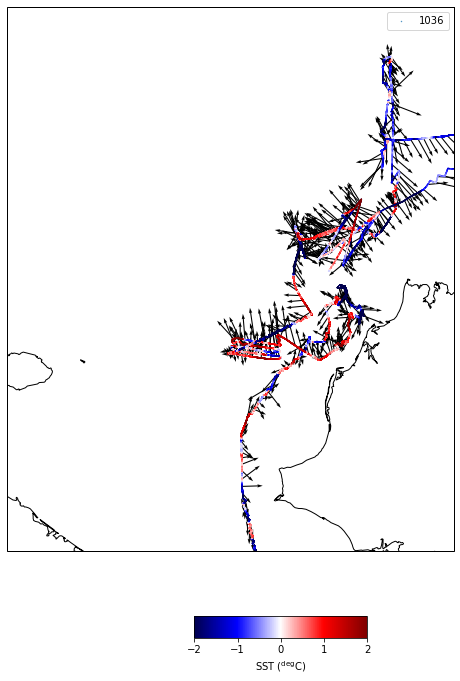

In [29]:
fig = plt.figure(figsize=(8,15))
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=180.0))  # create a set of axes with Mercator projection
for i in range(1):
    ds2 = ds.isel(trajectory=i).sel(time=slice('2019-05-01','2019-09-15'))
    im2=ax.quiver(ds2.lon[::200].data,
                 ds2.lat[::200].data,
                 ds2.UWND_MEAN[::200].data,
                 ds2.VWND_MEAN[::200].data,
                 scale=140,transform=ccrs.PlateCarree())
    im=ax.scatter(ds2.lon,ds2.lat,
                  c=ds2.TEMP_AIR_MEAN-ds2.sea_water_temperature_00_mean,
                  s=.15,transform=ccrs.PlateCarree(),label=ds.trajectory[i].data,
                  cmap='seismic',vmin=-2,vmax=2)
    ax.coastlines(resolution='10m')                
    ax.set_extent([-180,-158,68,77])
    ax.legend()
    cax = fig.add_axes([0.45, 0.17, 0.3, 0.02])
    cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
    cbar.set_label('SST ($^\deg$C)')
fig.savefig(fig_dir+'figs/map_nasa_data_air-sbe5600.png')

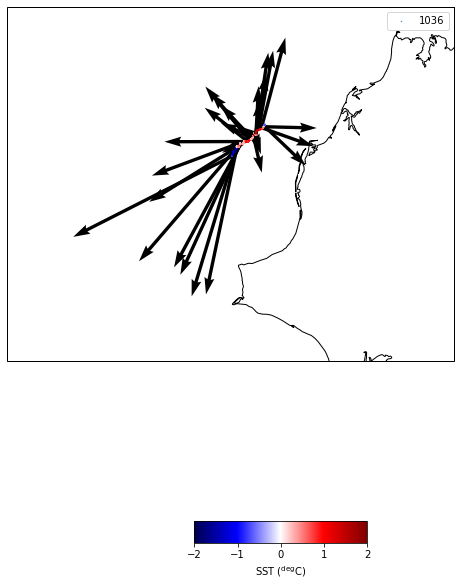

In [44]:
fig = plt.figure(figsize=(8,15))
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=180.0))  # create a set of axes with Mercator projection
for i in range(1):
    ds2 = ds.isel(trajectory=i).sel(time=slice('2019-06-15','2019-06-16'))
    im2=ax.quiver(ds2.lon[::100].data,
                 ds2.lat[::100].data,
                 ds2.UWND_MEAN[::100].data,
                 ds2.VWND_MEAN[::100].data,
                 scale=20,transform=ccrs.PlateCarree())
    im=ax.scatter(ds2.lon,ds2.lat,
                  c=ds2.TEMP_AIR_MEAN-ds2.sea_water_temperature_00_mean,
                  s=.15,transform=ccrs.PlateCarree(),label=ds.trajectory[i].data,
                  cmap='seismic',vmin=-2,vmax=2)
    ax.coastlines(resolution='10m')                
    ax.set_extent([-175,-158,68,72])
    ax.legend()
    cax = fig.add_axes([0.45, 0.17, 0.3, 0.02])
    cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
    cbar.set_label('SST ($^\deg$C)')
fig.savefig(fig_dir+'figs/map_nasa_data_air-sbe5600-06-15.png')

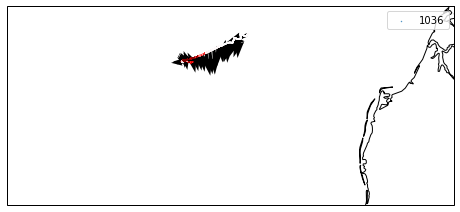

In [53]:
ig = plt.figure(figsize=(8,15))
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=180.0))  # create a set of axes with Mercator projection
for i in range(1):
    ds2 = ds.isel(trajectory=i).sel(time=slice('2019-07-08','2019-07-10'))
    im2=ax.quiver(ds2.lon[::100].data,
                 ds2.lat[::100].data,
                 ds2.UWND_MEAN[::100].data,
                 ds2.VWND_MEAN[::100].data,
                 scale=100,transform=ccrs.PlateCarree())
    im=ax.scatter(ds2.lon,ds2.lat,
                  c=ds2.sea_water_temperature_00_mean-ds2.sea_water_temperature_06_mean,
                  s=.15,transform=ccrs.PlateCarree(),label=ds.trajectory[i].data,
                  cmap='seismic',vmin=-2,vmax=2)
    ax.coastlines(resolution='10m')                
    ax.set_extent([-173,-160,70,71])
    ax.legend()
    cax = fig.add_axes([0.45, 0.17, 0.3, 0.02])
    cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
    cbar.set_label('SST ($^\deg$C)')
fig.savefig(fig_dir+'figs/map_nasa_data_air-sbe5600-07-10.png')

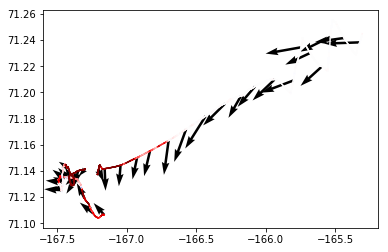

In [49]:
plt.quiver(ds2.lon[::100].data,
                 ds2.lat[::100].data,
                 ds2.UWND_MEAN[::100].data,
                 ds2.VWND_MEAN[::100].data,
                 scale=50)
plt.scatter(ds2.lon,ds2.lat,
                  c=ds2.sea_water_temperature_00_mean-ds2.sea_water_temperature_06_mean,
                  s=.15,
                  cmap='seismic',vmin=-2,vmax=2)


In [54]:
%matplotlib inline
import sys
sys.path.append('./../../flux/')
from coare3 import coare3


In [55]:
coare3

<function coare3.coare3(inputs)>